In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Plotting and Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl  # used sparingly
import matplotlib.pyplot as plt

In [3]:
pd.set_option("notebook_repr_html", False)
pd.set_option("max_rows", 10)

## Landscape of Plotting Libraries

* [matplotlib](http://matplotlib.org/)
  * pandas
  * [seaborn](http://stanford.edu/~mwaskom/software/seaborn/)
* [mpld3](http://mpld3.github.io/)
  * "Bringing matplotlib to the browser"
* [d3py](https://github.com/mikedewar/d3py)
  * "a plotting library for python based on d3."
* [mayavi](http://docs.enthought.com/mayavi/mayavi/)
  * "seeks to provide easy and interactive visualization of 3D data."
* [ggplot](https://github.com/yhat/ggplot)
  * "Yes, it's another port of ggplot2."
* [bokeh](http://bokeh.pydata.org/en/latest/)
  * "Bokeh is a Python interactive visualization library that targets modern web browsers for presentation."
* mpl_toolkits
  * [basemap](http://matplotlib.org/basemap/)
  * [mplot3d](http://matplotlib.org/1.4.3/mpl_toolkits/mplot3d/index.html)  

## Matplotlib Orientation

### Introduction

* Matplotlib is the *de facto* standard for plotting in Python
* Understanding matplotlib is key to unlocking its power

### Online Documentation

* Project web site is [here](http://matplotlib.org/)
* Examples [online](http://matplotlib.org/examples/index.html) and also in the [source code](https://github.com/matplotlib/matplotlib/tree/master/examples)
* API documentation is [here](http://matplotlib.org/api/index.html)
* The [FAQ](http://matplotlib.org/faq/index.html) may answer some of your questions
* Get to know the [gallery](http://matplotlib.org/gallery.html)

### Getting Help

* First stop should be the [gallery](http://matplotlib.org/gallery.html)
* Next stop could be [stackoverflow](https://stackoverflow.com/questions/tagged/matplotlib)
* There's also a [mailing list](http://sourceforge.net/p/matplotlib/mailman/)
* This notebook draws heavily from the following sources [E.g., [1](https://github.com/WeatherGod/AnatomyOfMatplotlib), [2](https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#matplotlib-plotting), [3](https://github.com/fonnesbeck/statistical-analysis-python-tutorial/blob/master/3.%20Plotting%20and%20Visualization.ipynb)]

### Notebook specifics

In [4]:
%matplotlib inline

### Backends

* Potential uses of matplotlib
  * interactively from python shell/IPython
  * Embed in a GUI
  * Generate postscript images in batch scripts
  * In a web application to serve graphs
* Each of these use cases is enabled by using a backend
* Two types
  * User interface / Interactive (for use in pygtk, wxpython, tkinter, qt4, or macosx)
  * Hard copy / Non-interactive (PNG, SVG, PDF, PS)
* Set your backend in your `matplotlibrc`
* Or with the `use` function (before importing `pyplot`

```python
from matplotlib import use
use('PS')  # postscript
```

### Configuration

* See [Customizing Matplotlib](http://matplotlib.org/users/customizing.html) for more information
* You can edit your `matplotlibrc` to change the matplotlib defaults

In [5]:
from matplotlib import matplotlib_fname
matplotlib_fname()

'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

* [This](http://www.huyng.com/posts/sane-color-scheme-for-matplotlib/) has a popular one
* Take a look at the [Seaborn project](https://www.stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html). More on that later.

You can also change them dynamically using the global rcParams object

In [6]:
from matplotlib import rcParams

In [7]:
rcParams.keys()

['agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format',
 'animation.html',
 'animation.mencoder_args',
 'animation.mencoder_path',
 'animation.writer',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits',
 'axes.formatter.use_locale',
 'axes.formatter.use_mathtext',
 'axes.formatter.useoffset',
 'axes.grid',
 'axes.grid.axis',
 'axes.grid.which',
 'axes.hold',
 'axes.labelcolor',
 'axes.labelpad',
 'axes.labelsize',
 'axes.labelweight',
 'axes.linewidth',
 'axes.prop_cycle',
 'axes.spines.bottom',
 'axes.spines.left',
 'axes.spines.right',
 'axes.spines.top',
 'axes.titlesize',
 'axes.titleweight',
 'axes.unicode_minus',
 'axes.xmargin',
 'axes.ymargin',
 'axes3d.grid',
 'backend',
 'backend.qt4',
 'backend.qt5',
 'backend_fallback',
 'boxplot.bootstrap',
 'boxplot.

In [8]:
rcParams['font.family']

['sans-serif']

In [9]:
rcParams['font.family'] = 'monospace'

In [10]:
rcParams['font.family']

['monospace']

In [11]:
rcParams['font.family'] = 'sans-serif'

You can also use the `rc_context` context manager

In [12]:
from matplotlib import rc_context

In [13]:
with rc_context({'font.family': 'monospace'}):
    print(rcParams['font.family'])

['monospace']


In [14]:
print(rcParams['font.family'])

['sans-serif']


## Interactive Plotting with PyPlot

* Interative backends allow plotting to the screen
* **Interactive mode** plots to the screen without calls to `show`
* Interactive mode does not require using pyplot
* Doing the following at the interpreter will show a plot

```python
import matplotlib.pyplot as plt
plt.ion()
plt.plot([1, 2, 3, 4, 5])
plt.title("Title")
```

* At IPython interpreter enable interactive with (or set it in `matplotlibrc`

```python
import matplotlib.pyplot as plt
plt.ion()
```

or with

```
from matplotlib import interactive
interactive()
```

In [15]:
import matplotlib.pyplot as plt

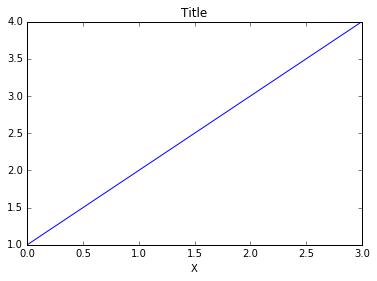

In [16]:
plt.plot([1, 2, 3, 4])
plt.title("Title")
plt.xlabel("X")

* If using object method calls, you must call `draw` or `draw_if_interactive` to see changes
* Again, this is unnecessary in the notebook

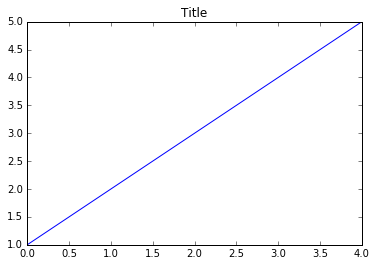

In [17]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4, 5])
ax.set_title("Title")
plt.draw_if_interactive()

* By default the `plot` method takes x values, then y values
* If the y values are omitted, then it is assumed that the x values are the indices of the given values

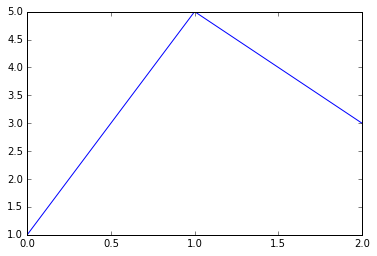

In [18]:
plt.plot([1, 5, 3])

#### What is the `pyplot` namespace?

* It's where everything comes together
* Usually where you want to start
* Broadly, 3 categories of functions
* **Plotting preparation**
* **Plotting functions**
* **Plot modifiers**

## Plotting Preparation

Function          | Description                                                                                
:-----------------|:----------------------------------------------------------
`autoscale`       | Autoscale the axis view to the data (toggle).
`axes`            | Add an axes to the figure.                                                                 
`axis`            | Convenience method to get or set axis properties.
`cla`             | Clear the current axes.                                                                    
`clf`             | Clear the current figure.                                                                  
`clim`            | Set the color limits of the current image.                                                 
`delaxes`         | Remove an axes from the current figure.                                                    
`locator_params`  | Control behavior of tick locators.                                                         
`margins`         | Set or retrieve autoscaling margins.
`figure`          | Creates a new figure.                                                                      
`gca`             | Return the current axis instance.                                                          
`gcf`             | Return a reference to the current figure.                                                  
`gci`             | Get the current colorable artist.                                                          
`hold`            | Set the hold state.                                                                        
`ioff`            | Turn interactive mode off.                                                                 
`ion`             | Turn interactive mode on.                                                                  
`ishold`          | Return the hold status of the current axes.                                                
`isinteractive`   | Return status of interactive mode.                                                         
`rc`              | Set the current rc params.                                                                 
`rc_context`      | Return a context manager for managing rc settings.                                         
`rcdefaults`      | Restore the default rc params.                                                             
`savefig`         | Save the current figure.                                                                   
`sca`             | Set the current Axes instance.                                                     
`sci`             | Set the current image.                                                                     
`set_cmap`        | Set the default colormap
`setp`            | Set a property on an artist object
`show`            | Display a figure
`subplot`         | Return a subplot axes positioned by the given grid definition.                             
`subplot2grid`    | Create a subplot in a grid.                                                                
`subplot_tool`    | Launch a subplot tool window for a figure.                                                 
`subplots`        | Create a figure with a set of subplots already made.                                       
`subplots_adjust` | Tune the subplot layout.                                                                   
`switch_backend`  | Switch the default backend.                                                                
`tick_params`     | Change the appearance of ticks and tick labels.                                            
`ticklabel_format`| Change the ScalarFormatter used by default for linear axes.           
`tight_layout`    | Automatically adjust subplot parameters to give specified padding.                         
`xkcd`            | Turns on [XKCD](http://xkcd.com/) sketch-style drawing mode.                             
`xlabel`          | Set the *x* axis label of the current axis.                                                
`xlim`            | Get or set the *x* limits of the current axes.                                             
`xscale`          | Set the scaling of the *x*-axis.                                                           
`xticks`          | Get or set the *x*-limits of the current tick locations and labels.                        
`ylabel`          | Set the *y* axis label of the current axis.                                                
`ylim`            | Get or set the *y*-limits of the current axes.                                             
`yscale`          | Set the scaling of the *y*-axis.                                                           
`yticks`          | Get or set the *y*-limits of the current tick locations and labels.                        

## Plotting Functions

Function          | Description
:-----------------|:--------------------------------------------
`acorr`           | Plot the autocorrelation of *x*
`bar`             | Make a bar plot
`barbs`           | Plot a 2-D field of barbs
`barh`            | Make a horizontal bar plot
`boxplot`         | Make a box and whisker plot
`broken_barh`     | Plot horizontal bars
`cohere`          | Plot the coherence between *x* and *y*
`contour`         | Plot contours
`contourf`        | Plot filled contours
`csd`             | Plot cross-spectral density
`errorbar`        | Plot an errorbar graph
`eventplot`       | Plot identical parallel lines at specific positions
`fill`            | Plot filled polygons
`fill_between`    | Make filled polygons between two curves
`fill_betweenx`   | Make filled polygons between two horizontal curves
`hexbin`          | Make a hexagonal binning plot
`hist`            | Plot a histogram
`hist2d`          | Make a 2D histogram plot
`imshow`          | Display an image on the axes
`loglog`          | Make a plot with log scaling on both the *x* and *y* axis
`matshow`         | Display an array as a matrix in a new figure window
`pcolor`          | Create a pseudocolor plot of a 2-D array
`pcolormesh`      | Plot a quadrilateral mesh
`pie`             | Plot a pie chart
`plot`            | Plot lines and/or markers
`plot_date`       | Plot with data with dates
`polar`           | Make a polar plot
`psd`             | Plot the power spectral density
`quiver`          | Plot a 2-D field of arrows
`scatter`         | Make a scatter plot of x vs y
`semilogx`        | Make a plot with log scaling on the *x* axis 
`semilogy`        | Make a plot with log scaling on the *y* axis
`specgram`        | Plot a spectrogram
`spy`             | Plot the sparsity pattern on a 2-D array
`stackplot`       | Draws a stacked area plot
`stem`            | Create a stem plot
`step`            | Make a step plot
`streamplot`      | Draws streamlines of a vector flow
`tricontour`      | Draw contours on an unstructured triangular grid
`tricontourf`     | Draw filled contours on an unstructured triangular grid
`tripcolor`       | Create a pseudocolor plot of an unstructured triangular grid
`triplot`         | Draw a unstructured triangular grid as lines and/or markers
`xcorr`           | Plot the cross-correlation between *x* and *y*

## Plot modifiers

Function          | Description                                                                                
:-----------------|:---------------------------------------------------------------------
`annotate`        | Create an annotation: a piece of text referring to a data point
`arrow`           | Add an arrow to the axes
`axhline`         | Add a horizontal line across the axis
`axhspan`         | Add a horizontal span (rectangle) across the axis
`axvline`         | Add a vertical line across the axes
`axvspan`         | Add a vertical span (rectangle) across the axes
`box`             | Turn the axes box on or off
`clabel`          | Label a contour plot
`colorbar`        | Add a colorbar to a plot
`grid`            | Turn the axes grids on or off
`hlines`          | Plot horizontal lines
`legend`          | Place a legend on the current axes
`minorticks_off`  | Remove minor ticks from the current plot
`minorticks_on`   | Display minor ticks on the current plot
`quiverkey`       | Add a key to a quiver plot
`rgrids`          | Get or set the radial gridlines on a polar plot
`suptitle`        | Add a centered title to the figure
`table`           | Add a table to the current axes
`text`            | Add text to the axes
`title`           | Set a title of the current axes
`vlines`          | Plot vertical lines
`xlabel`          | Set the *x* axis label of the current axis
`ylabel`          | Set the *y* axis label of the current axis"

## Figures

* The `Figure` is the central object of matplotlib
* It is the GUI window that contains the plot 

In [19]:
plt.Figure?

In [20]:
fig = plt.Figure()

* Close the last made Figure, by default

In [21]:
plt.close()  

* You can also refer to figures by their number starting at 1
* `plt.close('all')` is handy

* One of the most commonly used option used to create a Figure is `figsize`, a tuple of integers specifying the width and height in inches

In [22]:
fig = plt.figure(figsize=(5, 5))

## Axes

* The **Axes** object is contained within and belongs to a figure 
* This is where the plotting happens
* You will interact with the Axes most often
* Use the `add_subplot` method to put an axes on a figure
* It takes the shorthand for n_rows, n_cols, plot_number

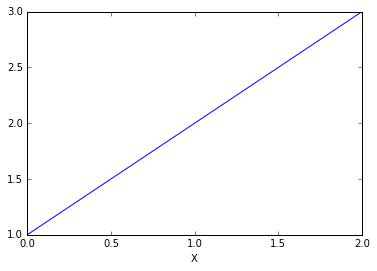

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
lines = ax.plot([1, 2, 3])
text = ax.set_xlabel("X")

* You may have guessed that you can have more than one axes on a plot

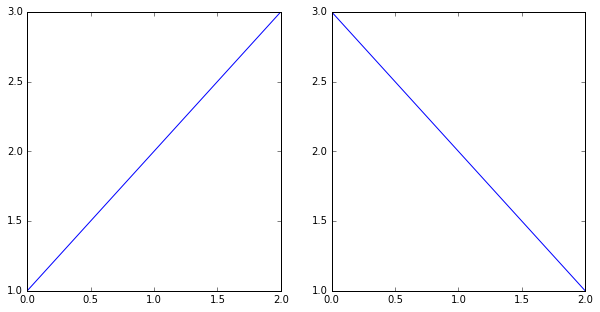

In [24]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot([1, 2, 3])

ax2 = fig.add_subplot(122)
ax2.plot([3, 2, 1])

## Library Plotting

* You'll notice above that I stopped using `plt` for almost everything but figure creation
* This is usually how I use matplotlib and allows the most flexible, powerful usage
* In fact, most calls functions in the `pyplot` namespace call `gca` to get the current axis and then delegate to the method of the Axes object

In [25]:
plt.xlabel??

* You'll also notice that I assign the returns from the matplotlib object method calls to variables
* This is a good habit to get in and we will see why below

* One last handy function is `plt.subplots`
* It's almost all I ever use from the `plt` namespace with a few exceptions

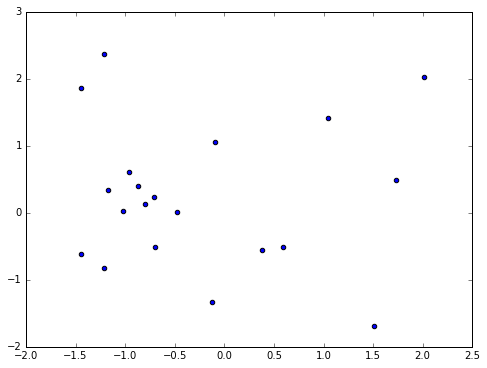

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(np.random.randn(20), np.random.randn(20))

**Notebook aside**

You can work on figures across cells. Just make the existing figure object the last line in the cell.

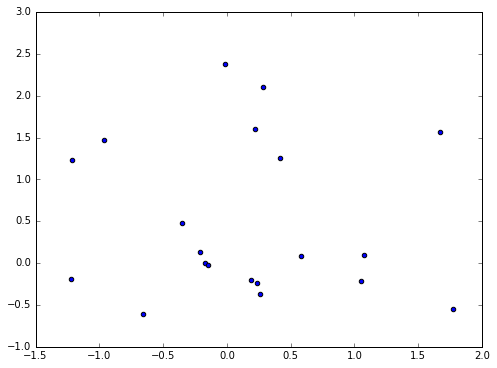

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(np.random.randn(20), np.random.randn(20))

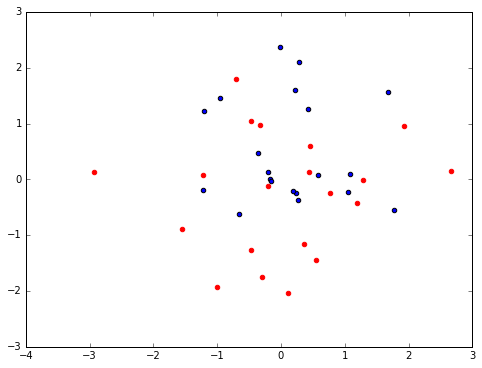

In [28]:
ax.scatter(np.random.randn(20), np.random.randn(20), color='r')
fig

**Exercise**

Let's make some basic plots. Make a scatter plot as above with 500 points. Draw random numbers from 0 to 100 for the y axis and set the limits of the y axis at 0 and 200.

### Styling

In [29]:
plt.plot?

#### Colors

* Single letter shortcuts
```
    b: blue
    g: green
    r: red
    c: cyan
    m: magenta
    y: yellow
    k: black
    w: white
```

* Shades of gray string float in the 0-1 range

    color = '0.75'


* HTML hex strings

    color = '#eeefff'


* R, G, B tuples with R, G, B in [0, 1]
* HTML names for colors, like ‘red’, ‘burlywood’ and ‘chartreuse’

#### Markers

* See [here](http://matplotlib.org/api/markers_api.html#markers) for the full list
* A few commonly used ones are

```
".":	point
",":	pixel
"o":	circle
"*":	star
"+":	plus
"x":	x
"D”:	diamond
```

#### Linestyles

```
'-'	solid
'--'	dashed
'-.'	dash_dot
':'	dotted
'None'	draw nothing
' '	draw nothing
''	draw nothing
```

**Exercises**

Create a figure that holds two subplots in two rows. In the top one, plot a sin curve from $-2\pi$ to $2\pi$ in green. In the second one, plot a dashed red line (**Hint**: you may find `np.linspace` to be useful).

In [30]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

In [31]:
y = np.sin(x)

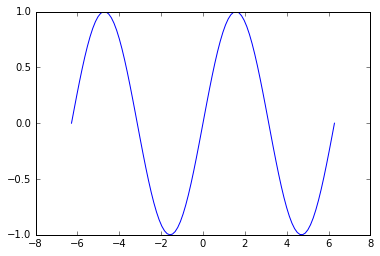

In [32]:
plt.plot(x, y)

### Labels and Legends

You can label many things in matplotlib

Labeling lines allows automatic legend creation

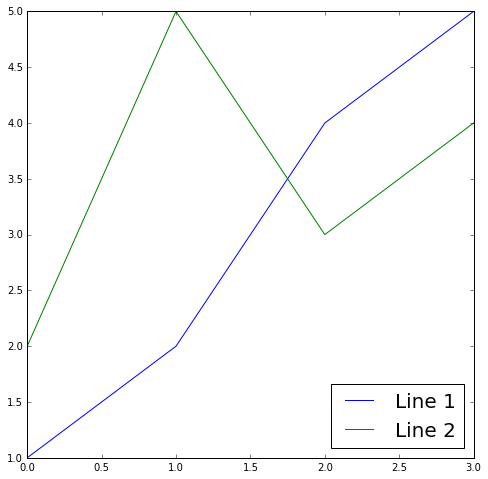

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([1, 2, 4, 5], label="Line 1")
ax.plot([2, 5, 3, 4], label="Line 2")
legend = ax.legend(loc='best', fontsize=20)

You can label the X and Y axes

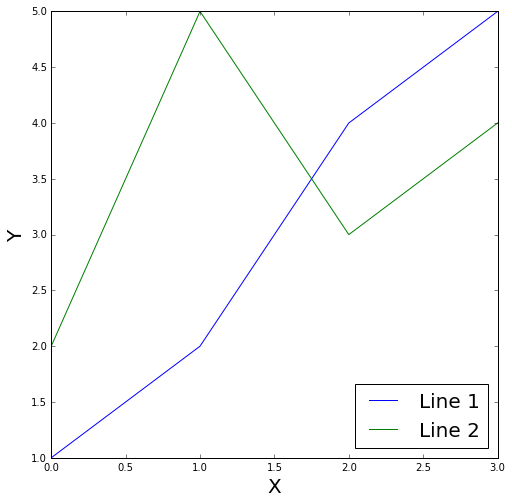

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([1, 2, 4, 5], label="Line 1")
ax.plot([2, 5, 3, 4], label="Line 2")

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
legend = ax.legend(loc='best', fontsize=20)

Label the axes with a title

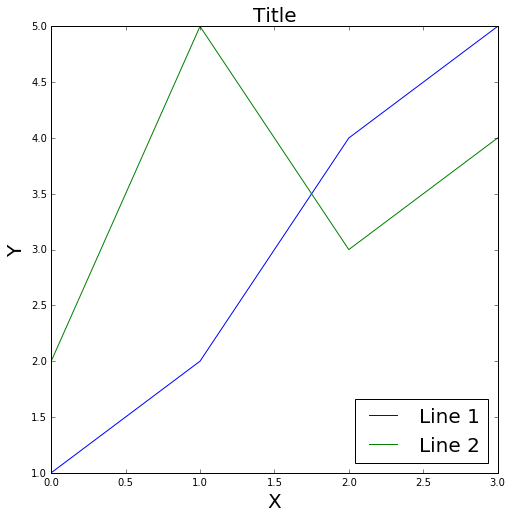

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([1, 2, 4, 5], label="Line 1")
ax.plot([2, 5, 3, 4], label="Line 2")

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)

ax.set_title("Title", fontsize=20)

legend = ax.legend(loc='best', fontsize=20)

### Ticks and Tick Labels

* The Ticks are the location of the Tick labels
* The Tick lines denote the Ticks
* The Tick labels are the text accompanying the tick
* A [Ticker](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) determines the ticks and their labels automatically
* You can use `tick_params` to adjust the appearance of the ticks

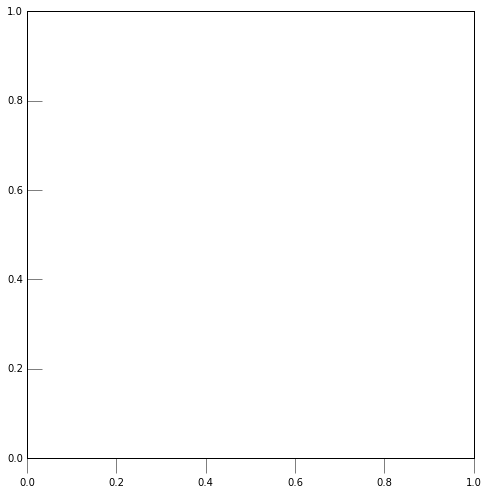

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
ax.tick_params(axis='y', which='major', length=15, right=False)
ax.tick_params(axis='x', which='major', length=15, top=False, direction="out", pad=15)

You can set your own tick labels

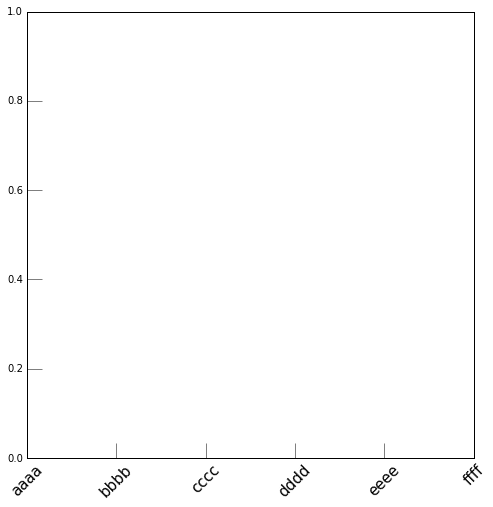

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
ax.tick_params(axis='y', which='major', length=15, right=False)
ax.tick_params(axis='x', which='major', length=15, top=False)

ticklabels = ax.xaxis.set_ticklabels(['aaaa', 'bbbb', 'cccc', 
                                      'dddd', 'eeee', 'ffff'],
                                     rotation=45, fontsize=15)

### Spines

The spines are the boundaries of the axes, and they can be selectively turned off

In [38]:
ax.spines

{'bottom': <matplotlib.spines.Spine at 0x1d817bbdc88>,
 'left': <matplotlib.spines.Spine at 0x1d817bca4e0>,
 'right': <matplotlib.spines.Spine at 0x1d817bca828>,
 'top': <matplotlib.spines.Spine at 0x1d817bbdb70>}

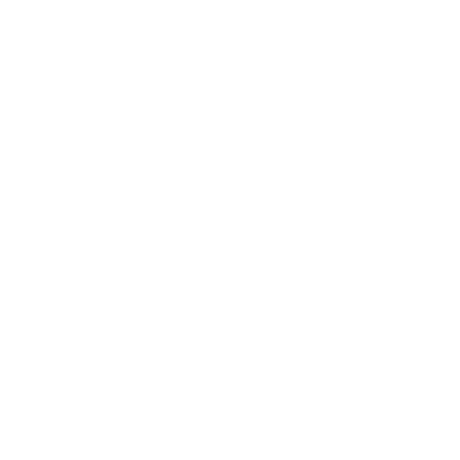

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.tick_params(bottom=False, top=False, left=False, right=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([]);

### More on plot

The `plot` function is a bit of a work horse with a flexible API

In [40]:
x, y = np.random.randn(2, 100)
x.sort()

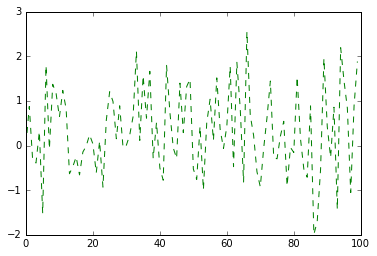

In [41]:
fig, ax = plt.subplots()
ax.plot(y, 'g--')

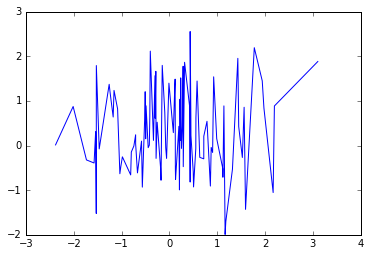

In [42]:
fig, ax = plt.subplots()
ax.plot(x, y)

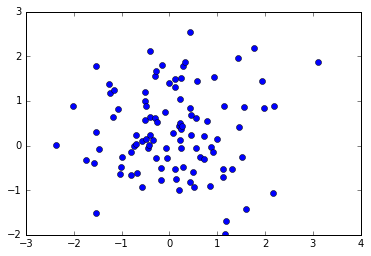

In [43]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o')

In [44]:
x2, y2 = np.random.randn(2, 200)
x2.sort()

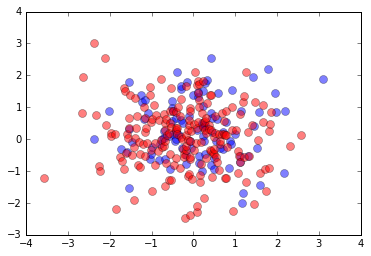

In [45]:
fig, ax = plt.subplots()
lines = ax.plot(x, y, 'o', x2, y2, 'ro', ms=8, alpha=.5)

## Plotting in Pandas vs Matplotlib

* Pandas provides a few accessors that allow you to stay fairly high-level without giving up any of the power and flexibility of matplotlib
* `Series` and `DataFrame`s have a plot method
* They take a `kind` keyword argument which accepts several values for plots other than the default line plot. These include:

   * `bar` or `barh` for bar plots
   * `hist` for histogram
   * `box` for boxplot
   * `kde` or 'density' for density plots
   * `area` for area plots
   * `scatter` for scatter plots
   * `hexbin` for hexagonal bin plots
   * `pie` for pie plots

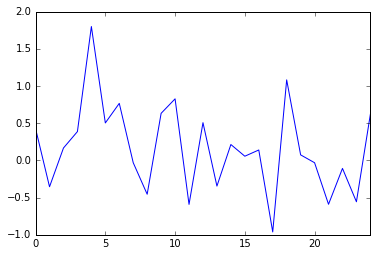

In [46]:
y = pd.Series(np.random.randn(25))
y.plot()

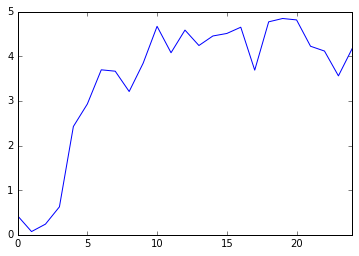

In [47]:
y.cumsum().plot()

* Notice that these return `AxesSubplot` objects, so we have our hook in to all of the powerful methods from matplotlib

* So, too, do `DataFrames`

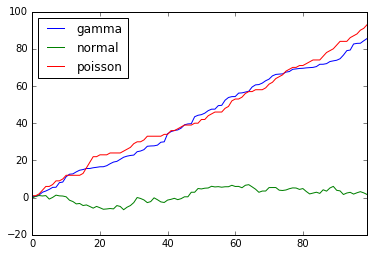

In [48]:
dta = pd.DataFrame({'normal': np.random.normal(size=100), 
                    'gamma': np.random.gamma(1, size=100), 
                   'poisson': np.random.poisson(size=100)})
ax = dta.cumsum(0).plot()

**Exercise**

Without re-plotting any of the above, re-size the fonts for the labels and the legend and display the figure.

* Alternatively, we can plot the above in separate subplots
* We can also change the figsize

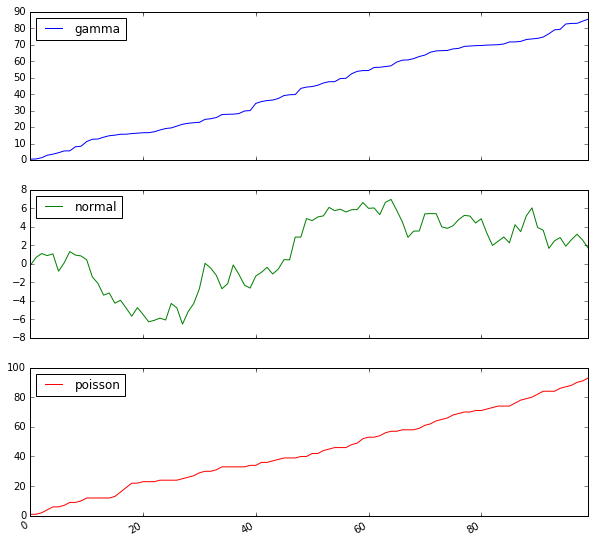

In [49]:
ax = dta.cumsum(0).plot(subplots=True, figsize=(10, 10))

* These are just matplotlib objects
* Note the use of [`tight_layout`](http://matplotlib.org/users/tight_layout_guide.html) below
* `tight_layout` automatically adjusts the subplot params so that the subplot fits the figure
* You can have more fine-grained control using 

```python
fig.subplots_adjust
```

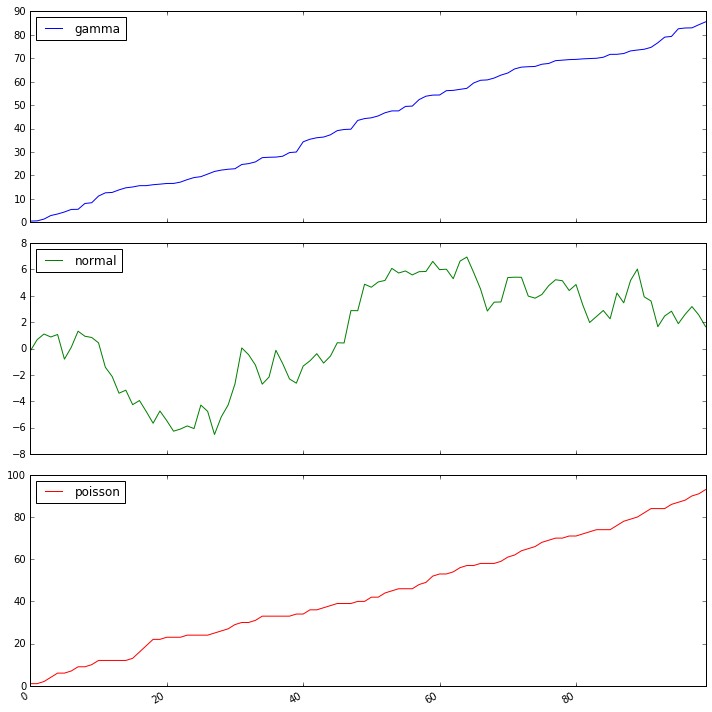

In [50]:
axes = dta.cumsum(0).plot(subplots=True, figsize=(10, 10))
fig = axes[0].figure
fig.tight_layout()

* We can easily add a secondary y-axis

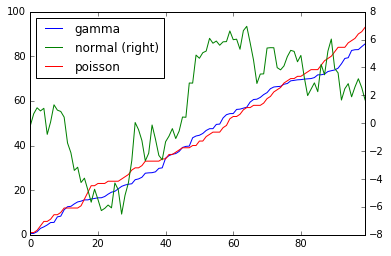

In [51]:
axes = dta.cumsum().plot(secondary_y='normal')

* We can also ask pandas to plot on already existing axes

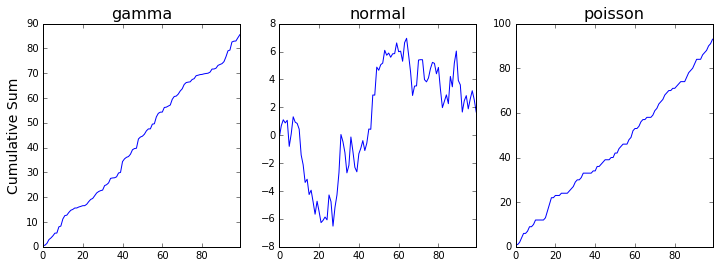

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, ax in enumerate(axes):
    variable = dta.columns[i]
    ax = dta[variable].cumsum().plot(ax=ax)
    ax.set_title(variable, fontsize=16)
    
axes[0].set_ylabel("Cumulative Sum", fontsize=14);

## Bar plots


* Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes.
* We can use the plot method with a kind='bar' argument.

* Let's use temperature data from NYC 1995 - 2014

In [53]:
dta = pd.read_csv("../data/weather_nyc.csv")

In [54]:
dta = dta.ix[dta.year < 2015]  # truncate to end of year

Or equivalently

In [55]:
dta.query("year < 2015")

      month  day  year  temp  season     tempc
0         1    1  1995  44.0  Winter  6.666667
1         1    2  1995  41.8  Winter  5.444444
2         1    3  1995  28.1  Winter -2.166667
3         1    4  1995  31.7  Winter -0.166667
4         1    5  1995  21.3  Winter -5.944444
...     ...  ...   ...   ...     ...       ...
7300     12   27  2014  47.4  Winter  8.555556
7301     12   28  2014  48.1  Winter  8.944444
7302     12   29  2014  41.3  Winter  5.166667
7303     12   30  2014  32.6  Winter  0.333333
7304     12   31  2014  29.4  Winter -1.444444

[7305 rows x 6 columns]

Recall that `pandas.cut` can be used to bin continuous data into buckets

In [56]:
bins = [dta.temp.min(), 32, 55, 80, dta.temp.max()]
bins

[-99.0, 32, 55, 80, 93.700000000000003]

In [57]:
labels = ["freezing", "cold", "warm", "hot"]

dta["temp_bin"] = pd.cut(dta.temp, bins, labels=labels)

In [58]:
try:
    from scipy.constants import F2C
except ImportError:  # no scipy installed
    def F2C(f):
        return (np.array(f) - 32)/1.8

In [59]:
lmap = lambda func, x : list(map(func, x))

Celsius bins

In [60]:
bins = [dta.tempc.min()] + lmap(F2C, (32, 55, 80)) + [dta.tempc.max()]
bins

[-72.777777777799997,
 0.0,
 12.777777777777777,
 26.666666666666664,
 34.277777777800004]

In [61]:
labels = ["freezing", "cold", "warm", "hot"]

dta["tempc_bin"] = pd.cut(dta.temp, bins, labels=labels)

In [62]:
dta.head()

   month  day  year  temp  season     tempc  temp_bin tempc_bin
0      1    1  1995  44.0  Winter  6.666667      cold       NaN
1      1    2  1995  41.8  Winter  5.444444      cold       NaN
2      1    3  1995  28.1  Winter -2.166667  freezing       hot
3      1    4  1995  31.7  Winter -0.166667  freezing       hot
4      1    5  1995  21.3  Winter -5.944444  freezing      warm

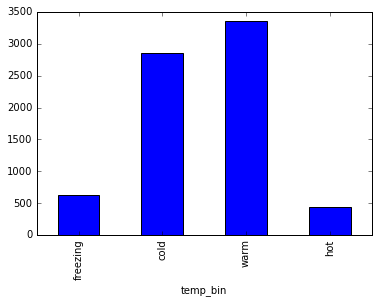

In [63]:
ax = dta.groupby("temp_bin").size().plot(kind="bar")

* What's wrong with this graph?
* Axis labels and tick labels to start
* Some things we can do through the `plot` method
* Some things we have to do with matplotlib

Make the xticks labels bigger and rotate them

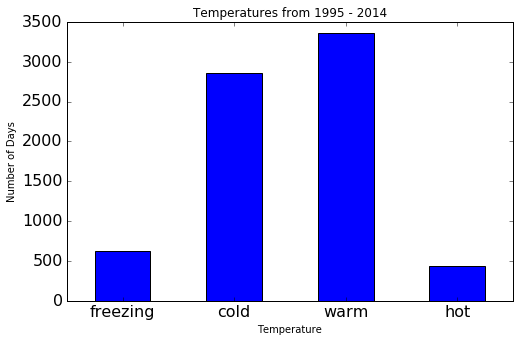

In [64]:
ax = dta.groupby("temp_bin").size().plot(kind="bar", rot=0, fontsize=16, figsize=(8, 5))

ax.set_xlabel("Temperature")
ax.set_ylabel("Number of Days")
ax.set_title("Temperatures from 1995 - 2014");

Horizontal bar chart

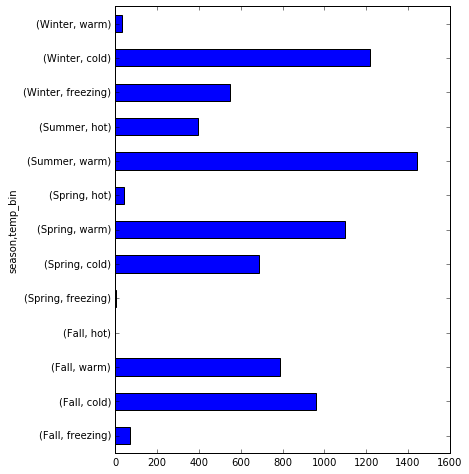

In [65]:
dta.groupby(["season", "temp_bin"]).size().plot(kind="barh", figsize=(6, 8))

Stacked bar chart

The pandas crosstab function creates a cross-tabulation of two or more factors.

In [66]:
ct = pd.crosstab(dta.temp_bin, dta.season)
ct

season    Fall  Spring  Summer  Winter
temp_bin                              
freezing    73       6       0     551
cold       959     686       0    1216
warm       786    1097    1442      31
hot          1      43     394       0

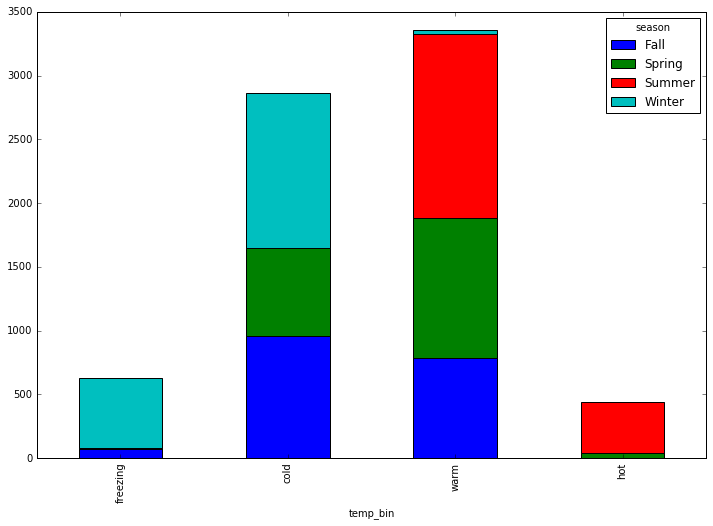

In [67]:
ax = ct.plot(kind="bar", stacked=True, figsize=(12, 8), grid=False, 
             legend=True)

* Matplotlib provides a variety of [ColorMaps](http://matplotlib.org/users/colormaps.html)
* The Paired colormap is a good qualitative colormap

In [68]:
colors = plt.cm.Paired(np.linspace(0, 1, 4))
colors

array([[ 0.65098041,  0.80784315,  0.89019608,  1.        ],
       [ 0.72287582,  0.61176473,  0.45751636,  1.        ],
       [ 0.93071896,  0.56470589,  0.27973857,  1.        ],
       [ 0.69411767,  0.34901962,  0.15686275,  1.        ]])

C:\Anaconda3\lib\site-packages\pandas\tools\plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


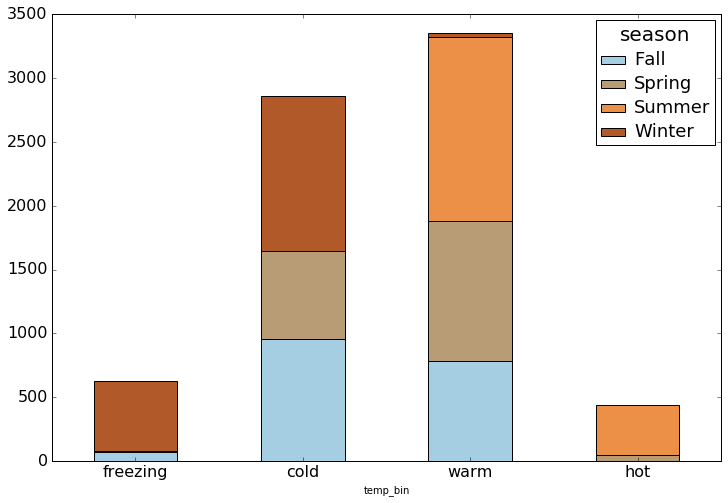

In [69]:
ax = pd.crosstab(dta.temp_bin, dta.season).plot(kind="bar", stacked=True, 
                                                figsize=(12, 8), grid=False, 
                                                legend=True, colors=colors, rot=0,
                                                fontsize=16)

# adjust the fontsize of the legend
legend = ax.get_legend()
for text in legend.get_texts():
    text.set_fontsize(18)
legend.get_title().set_fontsize(20)

## Histograms

* Frequently it is useful to look at the distribution of data before you analyze it. 
* Histograms display relative frequencies of data values
* The y-axis is always some measure of frequency, raw counts of values or scaled proportions

In [70]:
dta.temp.min()

-99.0

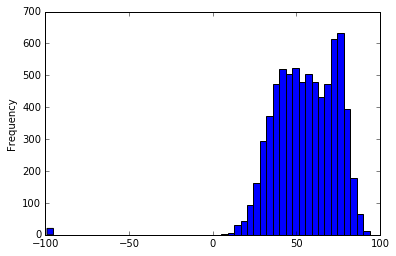

In [71]:
ax = dta.temp.plot(kind="hist", bins=50)

It's even a good exercise here! Let's drop turn the -99 into NaNs.

In [72]:
dta.ix[dta.temp == -99, ["temp", "tempc"]] = np.nan

Incidentally, pandas will handle nulls in plotting

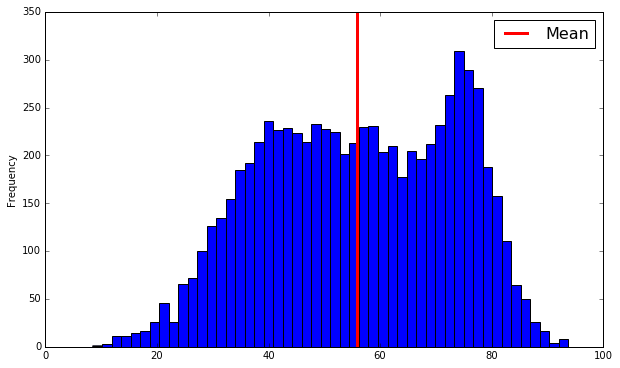

In [73]:
ax = dta.temp.plot(kind="hist", bins=50, grid=False, figsize=(10, 6))

# plot a vertical line that spans the axis
line = ax.axvline(dta.temp.mean(), color='r', lw=3, label="Mean")

# specifically add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[0]], [labels[0]], fontsize=16)

In [74]:
handles

* Optimal number of bins
* Scott's rule

$$h=\frac{3.5\sigma}{n^{1/3}}$$

In [75]:
def scotts_rule(x):
    x = x.dropna()
    std = x.std()
    return 3.5 * std / (len(x)**(1./3))

def width_to_nbins(x, h):
    x = x.dropna()
    return int(round(x.ptp()/h))

In [76]:
h = scotts_rule(dta.temp)
nbins = width_to_nbins(dta.temp, h)

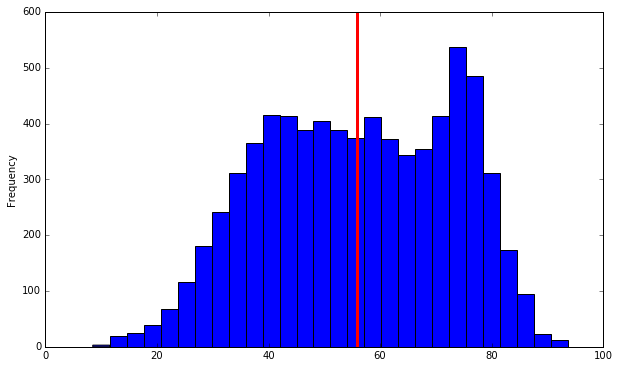

In [77]:
ax = dta.temp.plot(kind="hist", bins=nbins, grid=False, figsize=(10, 6))

# plot a vertical line that spans the axis
line = ax.axvline(dta.temp.mean(), color='r', lw=3, label="Mean")

## Density Plots

* Kernel Density Estimators are a kind of smoothed histogram (more on this later)
* Pandas provides a hook to KDE plots using statsmodels, if installed, or scipy

(0, 100)

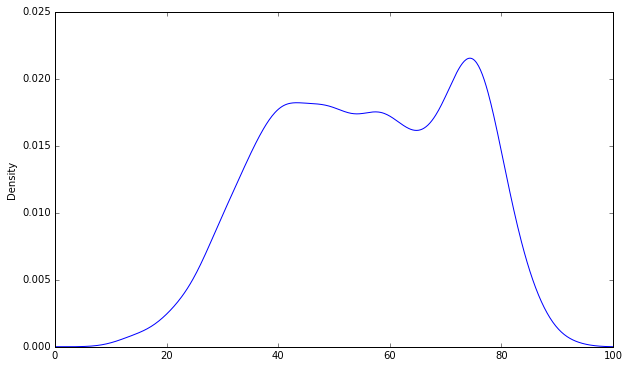

In [78]:
ax = dta.temp.plot(kind='kde', grid=False, figsize=(10, 6))
ax.set_xlim(0, 100)

We can compare the KDE to the normed histogram

(0, 100)

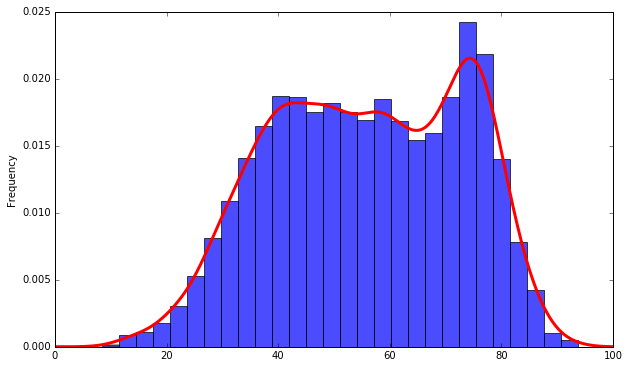

In [79]:
ax = dta.temp.plot(kind='kde', grid=False, figsize=(10, 6), color='r', lw=3)
ax = dta.temp.plot(kind="hist", bins=nbins, grid=False, figsize=(10, 6), ax=ax, normed=True, alpha=.7)
ax.set_xlim(0, 100)

**Exercise** 

Create KDE estimates for the temperature in each season on a single plot. Label the plotted lines.

## Box plots

* Boxplots (aka "box and whisker" plots) are a different way to display distributions of data
* The box contains the quartiles of the data
* The "whiskers" are typically the lower and upper 5 percent values
  * In matplotlib they are 1.5 * the lower/upper quarteriles by default
* The horizontal line is the median
* Boxplots have their own method on DataFrames

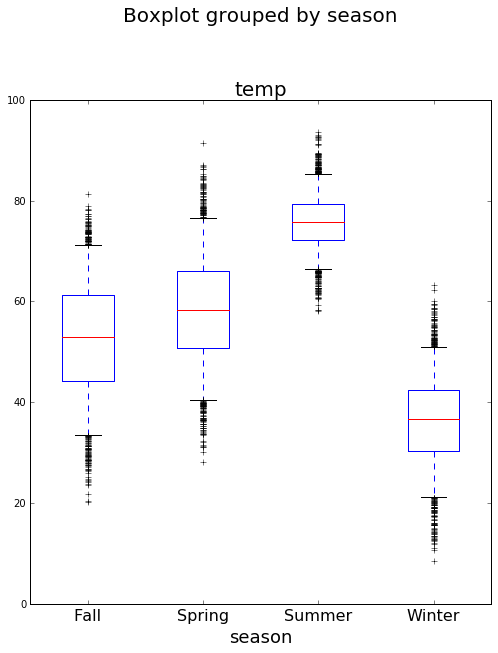

In [80]:
ax = dta.boxplot(column="temp", by="season", grid=False, figsize=(8, 10), fontsize=16,
                 whis=[5, 95])

ax.set_title(ax.get_title(), fontsize=20)
ax.xaxis.get_label().set_fontsize(18)

fig = ax.figure

# Change the size of the figure title
# http://stackoverflow.com/a/12449783/535665
fig.texts[0].set_fontsize(20)

# whitespace between axes and fig boundary
fig.subplots_adjust(top=.85)

* We can add some more information by overlaying the original data on the boxplot

In [81]:
def jitter(x, n, noise=.05):
    return x + np.random.normal(0, noise, size=n)

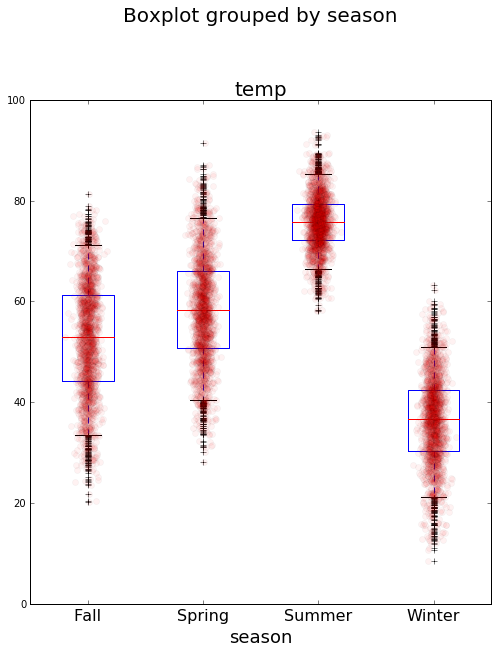

In [82]:
ax = dta.boxplot(column="temp", by="season", grid=False, figsize=(8, 10), fontsize=16,
                 whis=[5, 95])

ax.set_title(ax.get_title(), fontsize=20)
ax.xaxis.get_label().set_fontsize(18)

fig = ax.figure

# http://stackoverflow.com/a/12449783/535665
fig.texts[0].set_fontsize(20)

# whitespace between axes and fig boundary
fig.subplots_adjust(top=.85)

for i, season in enumerate(ax.get_xticklabels()):
    y = dta.ix[dta.season == season.get_text()].temp
    x = jitter(i + 1, len(y))
    # there's a lot of data so turn the alpha way down (or sub-sample)
    ax.plot(x, y, 'ro', alpha=.05)

## Scatterplots

* Let's load the baseball dataset to look at scatterplots

In [83]:
baseball = pd.read_csv("../data/baseball.csv")

In [84]:
baseball.head()

      id     player  year  stint team  lg   g  ab  r   h  ...   rbi   sb   cs  \
0  88641  womacto01  2006      2  CHN  NL  19  50  6  14  ...   2.0  1.0  1.0   
1  88643  schilcu01  2006      1  BOS  AL  31   2  0   1  ...   0.0  0.0  0.0   
2  88645  myersmi01  2006      1  NYA  AL  62   0  0   0  ...   0.0  0.0  0.0   
3  88649  helliri01  2006      1  MIL  NL  20   3  0   0  ...   0.0  0.0  0.0   
4  88650  johnsra05  2006      1  NYA  AL  33   6  0   1  ...   0.0  0.0  0.0   

   bb   so  ibb  hbp   sh   sf  gidp  
0   4  4.0  0.0  0.0  3.0  0.0   0.0  
1   0  1.0  0.0  0.0  0.0  0.0   0.0  
2   0  0.0  0.0  0.0  0.0  0.0   0.0  
3   0  2.0  0.0  0.0  0.0  0.0   0.0  
4   0  4.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 23 columns]

(0, 200)

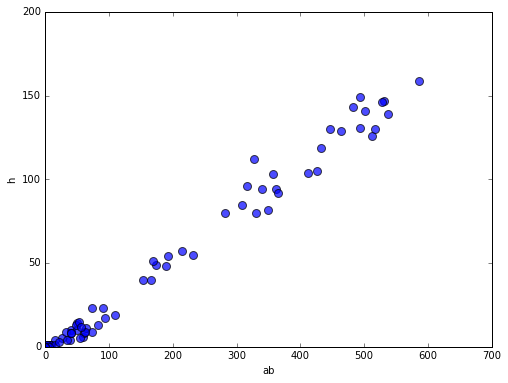

In [85]:
ax = baseball.plot(kind="scatter", x="ab", y="h", grid=False, figsize=(8, 6), s=8**2,
                   alpha=.7)
ax.margins(0)
ax.set_xlim(0, 700)
ax.set_ylim(0, 200)

* We can uncover more information by changing the size of the points

(0, 200)

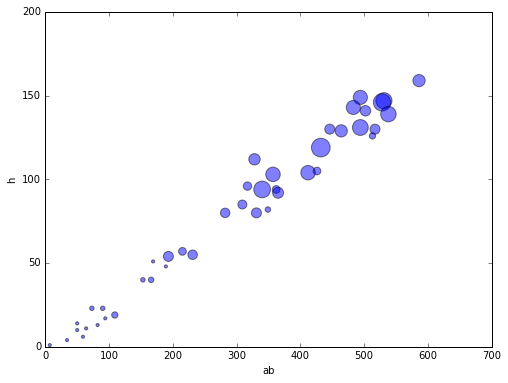

In [86]:
ax = baseball.plot(kind="scatter", x="ab", y="h", grid=False, figsize=(8, 6), s=baseball.hr*10,
                   alpha=.5)

ax.margins(0)
ax.set_xlim(0, 700)
ax.set_ylim(0, 200)

* Or by adding color using the `c` keyword

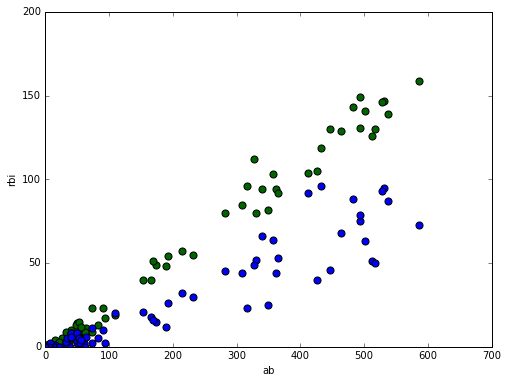

In [87]:
ax = baseball.plot(kind="scatter", x="ab", y="h", grid=False, figsize=(8, 6), c="DarkGreen", s=50)
ax = baseball.plot(kind="scatter", x="ab", y="rbi", grid=False, figsize=(8, 6), c="Blue", s=50, 
                   ax=ax)

ax.margins(0)
ax.set_xlim(0, 700)
ax.set_ylim(0, 200);

* `c` can also be a color intensity
* in this case we can specify a colormap through the `cmap` keyword

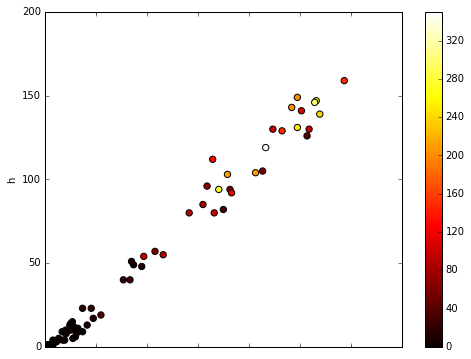

In [88]:
ax = baseball.plot(kind="scatter", x="ab", y="h", grid=False, figsize=(8, 6), c=baseball.hr*10,
                   s=40, cmap="hot")
ax.margins(0)
ax.set_xlim(0, 700)
ax.set_ylim(0, 200);

* Notice that there is a colorbar automatically
* We can adjust it just like all other things matplotlib
* It's actually implemented as a separate axes subplot in the figure

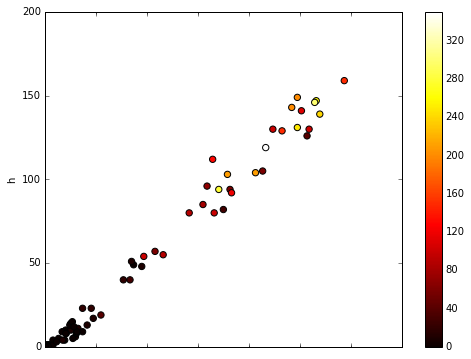

In [89]:
ax = baseball.plot(kind="scatter", x="ab", y="h", grid=False, figsize=(8, 6), c=baseball.hr*10,
                   s=40, cmap="hot")
ax.margins(0)
ax.set_xlim(0, 700)
ax.set_ylim(0, 200)

fig = ax.figure
# colorbars are actually a separate subplot in your figure
colorbar = fig.axes[1]
colorbar.yaxis.set_tick_params(right=False);

* Use `pd.scatter_matrix` To view a large number of variables simultaenously

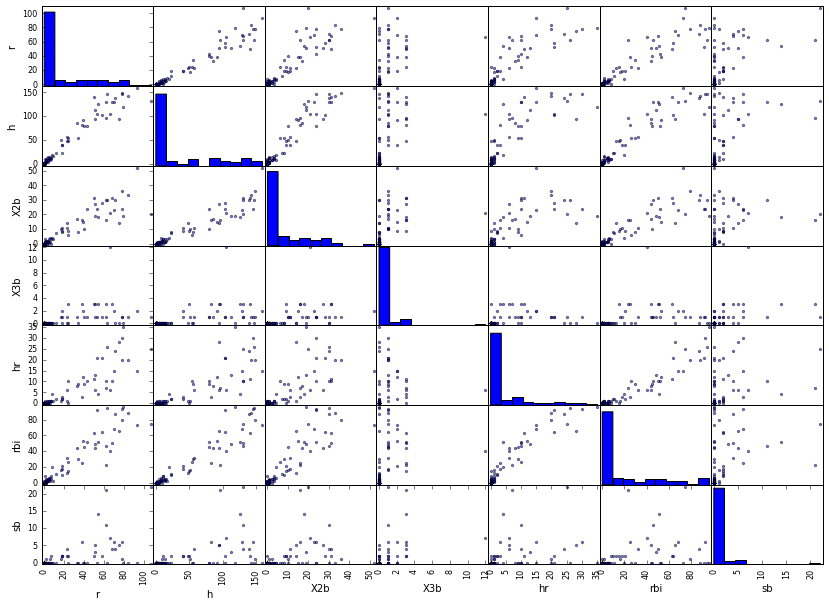

In [90]:
ax = pd.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(14, 10), diagonal='hist')

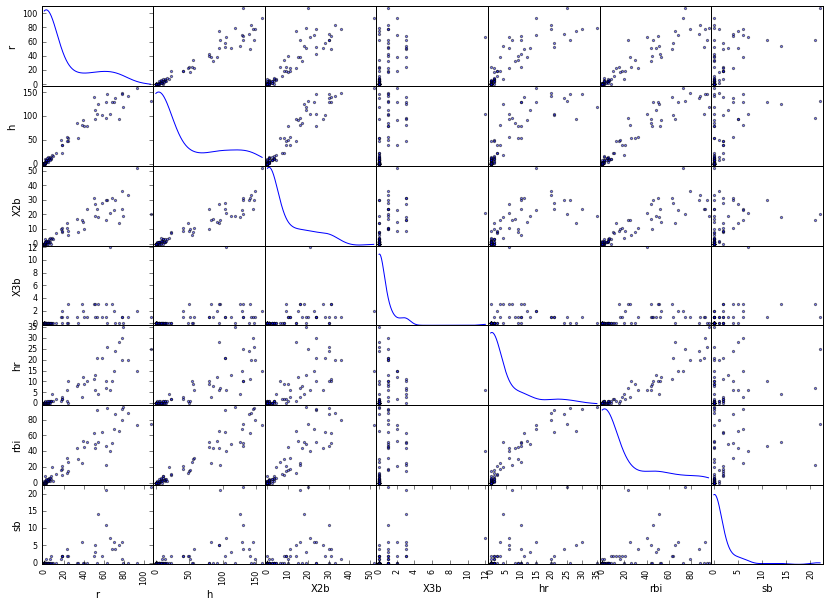

In [91]:
ax = pd.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(14, 10), diagonal='kde')

## Plotting Time-Series

* Let's convert the temperature data into a TimeSeries for convenience

In [92]:
idx = pd.to_datetime(dta.year*10000 + dta.month*100 + dta.day, format='%Y%m%d')

In [93]:
idx

0      1995-01-01
1      1995-01-02
2      1995-01-03
3      1995-01-04
4      1995-01-05
          ...    
7300   2014-12-27
7301   2014-12-28
7302   2014-12-29
7303   2014-12-30
7304   2014-12-31
dtype: datetime64[ns]

In [94]:
y = dta.set_index(idx).temp

In [95]:
y.head()

1995-01-01    44.0
1995-01-02    41.8
1995-01-03    28.1
1995-01-04    31.7
1995-01-05    21.3
Name: temp, dtype: float64

In [96]:
y.index

DatetimeIndex(['1995-01-01', '1995-01-02', '1995-01-03', '1995-01-04',
               '1995-01-05', '1995-01-06', '1995-01-07', '1995-01-08',
               '1995-01-09', '1995-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=7305, freq=None)

* Pandas plotting is DatetimeIndex aware
* Outside of the browser, you can pan and zoom and the tick labels adjust dynamically

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=True,min_periods=1).mean()
  from ipykernel import kernelapp as app


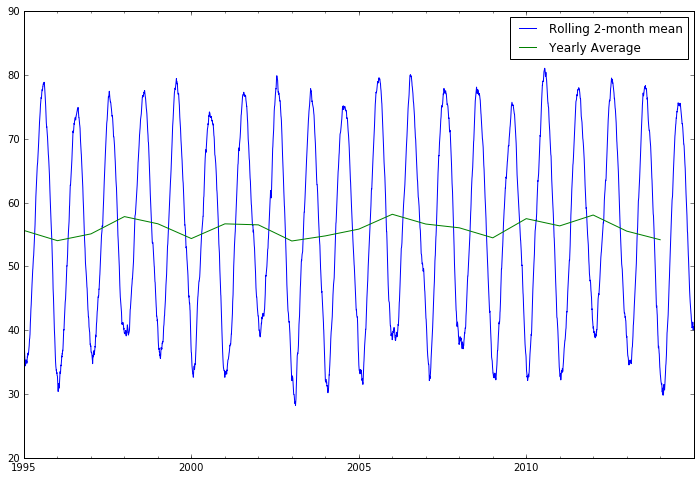

In [97]:
#ax = y.plot(figsize=(12, 8))
ax = pd.rolling_mean(y, window=60, min_periods=1, center=True).plot(figsize=(12, 8),
                                                                   label="Rolling 2-month mean")

means = y.groupby(lambda x : x.year).mean()
means.index = pd.DatetimeIndex(pd.to_datetime(means.index * 10000 + 1231, format="%Y%m%d"))
ax = means.plot(ax=ax, label="Yearly Average")

legend = ax.legend()

## GridSpec

* [GridSpec](http://matplotlib.org/users/gridspec.html) provides a high-level abstraction for placing subplots on a grid
* `plt.subplot2grid` is a helper function for creating grids of subplots
* To create a 2x2 figure with a reference to the first axes we could do 

```python
ax = plt.subplot(2, 2, 1)
```

* Equivalently with `subplot2grid`

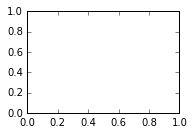

In [98]:
ax = plt.subplot2grid((2, 2), (0, 0))

* We can have more easy, fine-grained control with `subplot2grid` for creating multiple subplots that span columns, for example

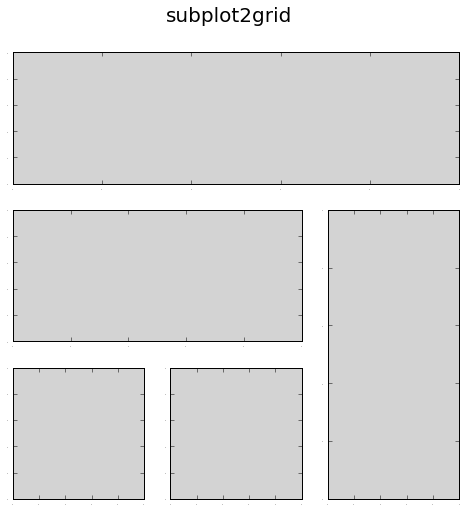

In [99]:
with plt.rc_context(rc={"xtick.labelsize": 0,
                        "ytick.labelsize": 0,
                        "axes.facecolor": "lightgray",
                        "figure.figsize": (8, 8)}):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
    ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
    ax4 = plt.subplot2grid((3,3), (2, 0))
    ax5 = plt.subplot2grid((3,3), (2, 1))
    
    ax1.figure.suptitle("subplot2grid", fontsize=20)

* You can use `GridSpec` class directly to create the same plot

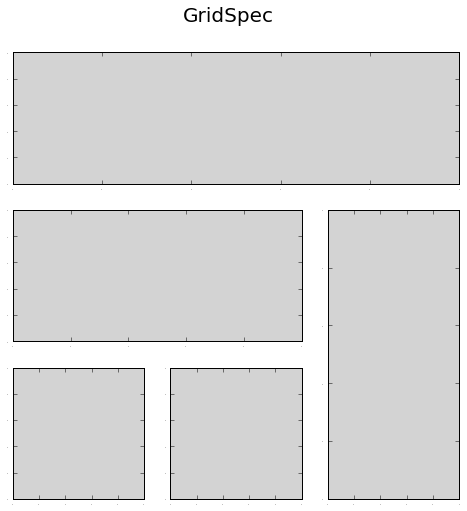

In [100]:
from matplotlib.gridspec import GridSpec


with plt.rc_context(rc={"xtick.labelsize": 0,
                        "ytick.labelsize": 0,
                        "axes.facecolor": "lightgray"}):


    fig, ax = plt.subplots(figsize=(8, 8))

    gs = GridSpec(3, 3)
    ax1 = plt.subplot(gs[0, :])
    # identical to ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=3))
    ax2 = plt.subplot(gs[1,:-1])
    ax3 = plt.subplot(gs[1:, -1])
    ax4 = plt.subplot(gs[-1,0])
    ax5 = plt.subplot(gs[-1,-2])

    fig.suptitle("GridSpec", fontsize=20)

## Seaborn

* [Seaborn](https://www.stanford.edu/~mwaskom/software/seaborn/index.html) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
* It is built on top of matplotlib
* Provides support for numpy and pandas
* Coupled with statistical routines from scipy and statsmodels 

### Trellis plots

"At the heart of quantitative reasoning is a single question: Compared to what? Small multiple designs, multivariate and data bountiful, answer directly by visually enforcing comparisons of changes, of the differences among objects, of the scope of alternatives. For a wide range of problems in data presentation, small multiples are the best design solution."

-Edward Tufte

* For medium-dimensional data,
* Multiple instances of the same plot on different subsets of your dataset. 
* Quickly extract a large amount of information about complex data. 

In [101]:
import seaborn as sns
tips = sns.load_dataset("tips")

In [102]:
tips.head()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### FacetGrid

* Used to visualize the distribution of a variable or the relationship between multiple variables  within subsets of your data 
* Can be drawn with up to three dimensions: row, col, and hue. 
* These should be discrete variables
* Say we wanted to examine differences between lunch and dinner in the tips dataset

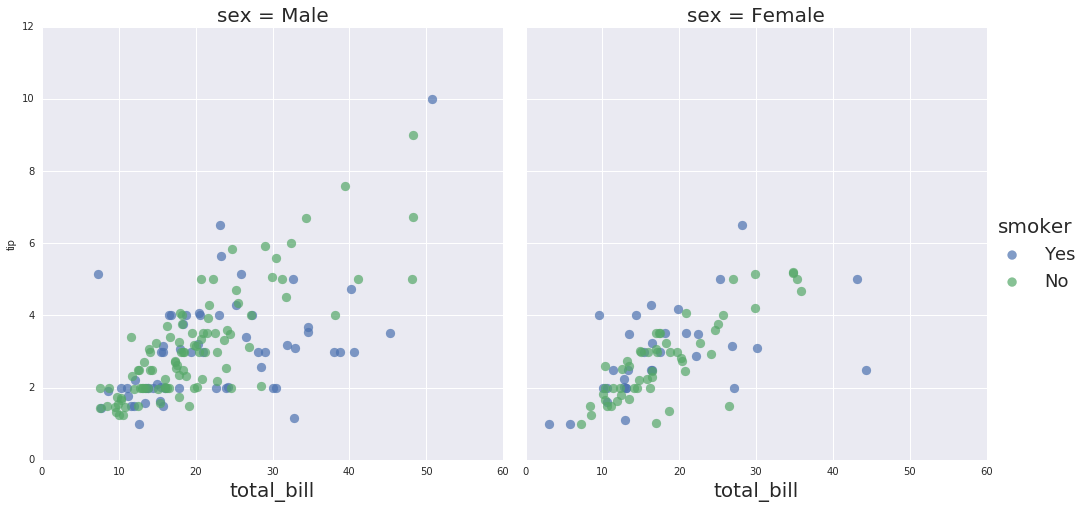

In [103]:
with mpl.rc_context(rc={"legend.fontsize": "18", "axes.titlesize": "18"}):
    g = sns.FacetGrid(tips, col="sex", hue="smoker", size=7)
    g.map(plt.scatter, "total_bill", "tip", alpha=.7, s=80)
    g.add_legend()
    
g._legend.get_title().set_fontsize(20)
g.axes[0, 0].title.set_fontsize(20)
g.axes[0, 0].xaxis.get_label().set_fontsize(20)
g.axes[0, 1].title.set_fontsize(20)
g.axes[0, 1].xaxis.get_label().set_fontsize(20)

#### Violin plot

The violin plot is a combination of a boxplot and a kernel density estimator

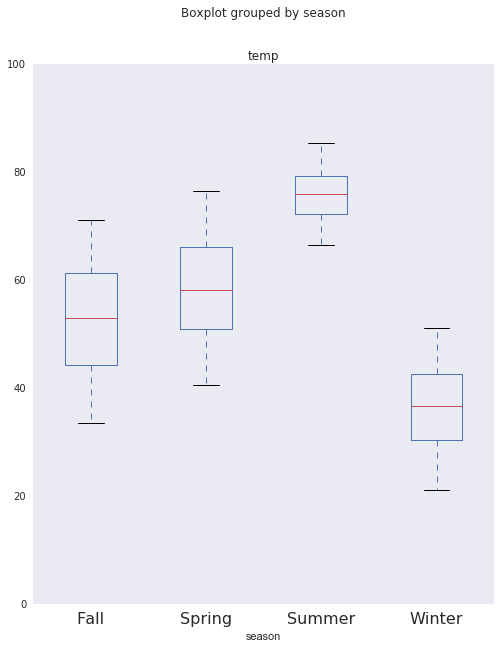

In [104]:
ax = dta.boxplot(column="temp", by="season", grid=False, figsize=(8, 10), fontsize=16,
                 whis=[5, 95])

In [105]:
X = dta[["temp", "season"]].dropna()

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


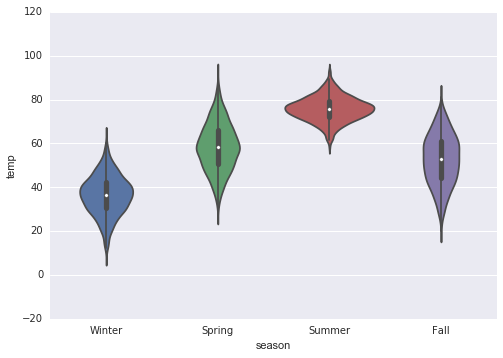

In [106]:
ax = sns.violinplot(X.temp, groupby=X.season)

We can plot the points inside the violins and re-order the seasons

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


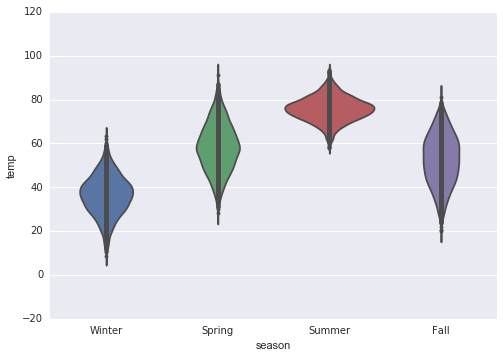

In [107]:
ax = sns.violinplot(X.temp, groupby=X.season, inner='points', alpha=.5,
                    order=['Winter', 'Spring', 'Summer', 'Fall'])

#### Distribution plots

Seaborn allows you to look at bivariate distributions. Here, we can compare the distribution of the temperatures in 1995 and 2014.

In [108]:
temp95 = dta.query("year == 1995")[["temp", "month", "day"]]
temp14 = dta.query("year == 2014")[["temp", "month", "day"]]

In [109]:
temps = temp95.merge(temp14, on=["month", "day"], how="inner", suffixes=("_95", "_14"))

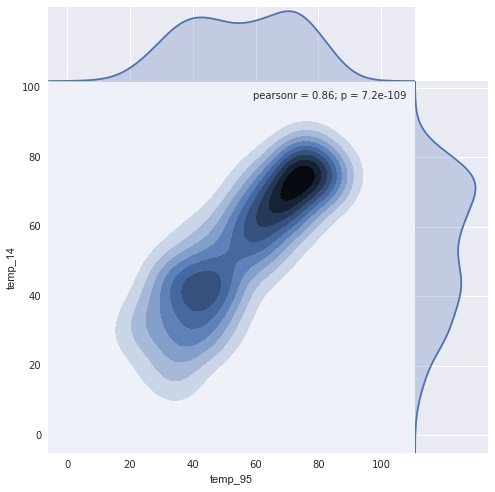

In [110]:
g = sns.jointplot(temps.temp_95, temps.temp_14, kind="kde", size=7, space=0)

We can also look at a hexbin plot of the same data with the marginal distributions as histograms.

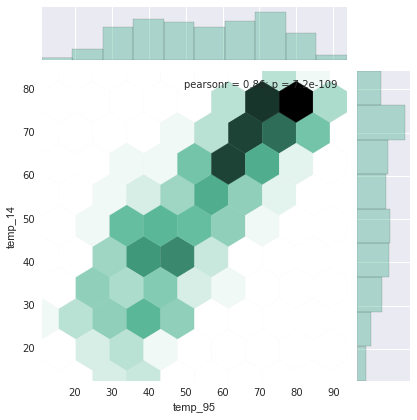

In [111]:
g = sns.jointplot(temps.temp_95, temps.temp_14, kind="hex", color="#4CB391", 
                  joint_kws={"bins": 200})

## mpld3

The mpld3 project brings together Matplotlib, and D3js, the popular Javascript library for creating interactive data visualizations for the web. The result is a simple API for exporting your matplotlib graphics to HTML code which can be used within the browser, within standard web pages, blogs, or tools such as the IPython notebook.

Let's look at a regular scatter plot

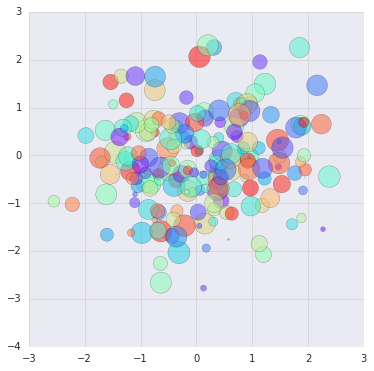

In [112]:
fig, ax = plt.subplots(figsize=(6, 6))
np.random.seed(0)
x, y = np.random.normal(size=(2, 200))
color, size = np.random.random((2, 200))

ax.scatter(x, y, c=color, s=500 * size, alpha=0.5, cmap="rainbow")
ax.grid(color='lightgray', alpha=0.7)

Unfortunately, this is just a static image. Let's use mpld3 to change that. Using the `display` command, you get a fully interactive visualization of the figure.

In [113]:
import mpld3
mpld3.display(fig)

ImportError: No module named 'mpld3'

Notice the toolbar on hover. You can use that to interact with the figure.

You can use mpld3 for every plot that you render in the notebook by executing

```python
mpld3.enable_notebook()
```

#### mpld3 plugins

Much like [event handling](http://matplotlib.org/users/event_handling.html) via callback functions in regular matplotlib (not covered in this notebook), you can define plugins for mpld3 to specify additional interactivity.

A number of plugins are built-in, and it is also possible to define new, custom plugins for nearly limitless interactive behaviors. For example, here is the built-in Linked Brushing plugin that allows exploration of multi-dimensional datasets:

In [ ]:
from mpld3 import plugins

fig, ax = plt.subplots(6, 6, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax[::-1]

X = baseball.loc[:, 'r':'rbi']
for i in range(6):
    for j in range(6):
        ax[i, j].xaxis.set_major_formatter(plt.NullFormatter())
        ax[i, j].yaxis.set_major_formatter(plt.NullFormatter())
        points = ax[i, j].scatter(X.values[:, j], X.values[:, i])
        if i == 0:
            ax[i, j].set_xlabel(X.columns[j])
    ax[i, 0].set_ylabel(X.columns[i])
    
plugins.connect(fig, plugins.LinkedBrush(points))
mpld3.display(fig)

# Putting it all together

* Let's recreate this graphic inspired by [Tufte's](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00014g)

In [ ]:
from IPython.display import Image, HTML
# Image("./tufte.svg")
HTML("./tufte.svg")

* This is a plot of NYC's weather in 2014 versus historical averages
  * Daily historical highs and lows
  * Historical confidence intervals around averages
  * The daily temperatures for 2013
  * Markers for new highs and lows
  * Annotations for points
  * Text for the graphic
  * Custom tick labels

* Load the data from yesterday

In [ ]:
import os

to_colors = lambda x : x/255.
 
blue3 = list(map(to_colors, (24, 116, 205)))  # 1874CD
wheat2 = list(map(to_colors, (238, 216, 174)))  # EED8AE
wheat3 = list(map(to_colors, (205, 186, 150)))  # CDBA96
wheat4 = list(map(to_colors, (139, 126, 102)))  # 8B7E66
firebrick3 = list(map(to_colors, (205, 38, 38)))  # CD2626
gray30 = list(map(to_colors, (77, 77, 77)))  # 4D4D4D

* You probably don't wan't to work with the month, day tuples in its present form for plotting
* Instead, you can use the below for the x axis

In [ ]:
idx = range(366)

* First, make the figure and plot the high and low bars (Hints: see the `ax.vlines`)
* The color is `wheat3`

* Second, plot the confidence intervals around the historical means
* The color is `wheat4`

* Plot the highs and lows of the present year in `present_highs` and `present_lows`
* You will need the x axes of these two objects to line up with your current x axis (**Hint**: you may find `np.where` to be helpful)

In [ ]:
np.where([True, False, False, True, False])[0]

* Annotate the points one of the 2014 historical lows and one of the 2014 historical highs with the appropriate text (**Hint**: see `ax.annotate`)
* You may want to look at some of the examples below for `annotate` and `arrows`

* Now, add text to the figure. (**Hint**: see `ax.text`)

* Finally, let's add the correct tick labels
* You can use unicode to add the $^\circ$

In [ ]:
yticks = range(-10, 101, 10)
ylabels = [str(i) + u"\u00b0" for i in yticks]
ylabels

## Other frequently used plotting tricks

### XKCD and Annotation

In [ ]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(1, 31)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10), zorder=-1)

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(0.5, 0.05, 
             '"Stove Ownership" from xkcd by Randall Monroe', ha='center')

In [ ]:
with plt.xkcd():
    # Based on "The data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([-0.125, 1.0-0.125], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    ax.set_yticks([])

    fig.suptitle("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(0.5, 0.01,
             '"The Data So Far" from xkcd by Randall Monroe',
             ha='center', )

### Tick Tricks

In [ ]:
from matplotlib.ticker import MaxNLocator

In [ ]:
x = np.arange(20)
y = np.random.randn(20)

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_major_locator(MaxNLocator(nbins=8))

### ColorMaps

See [colormap reference]()

### Sharing Axes

In [ ]:
x = np.arange(20)

y1 = np.random.randn(20)
y2 = np.random.randn(20)

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(x, y1)
axes[1].plot(x, y2)
fig.tight_layout()

### Twinning Axes

In [ ]:
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
s2 = np.sin(2*np.pi*t)

In [ ]:
fig, ax1 = plt.subplots()


ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('exp', color='b', fontsize=18)
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()

ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r', fontsize=18)

for tl in ax2.get_yticklabels():
    tl.set_color('r')

### Image Plots

In [ ]:
fig, ax = plt.subplots()
ax.imshow(np.random.uniform(0, 1, size=(50, 50)), cmap="RdYlGn")

### $LaTeX$

* By default, matplotlib uses its own $TeX$ enging for text and math layout
* You have the option to use call out to $TeX$, though by setting the `text.usetext` option

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel("$\\beta^2$", fontsize=20, rotation=0, labelpad=20)

In [ ]:
with mpl.rc_context(rc={"text.usetex": True}):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_ylabel("$\\beta^2$", fontsize=20, rotation=0, labelpad=20)

### Contour Plots

In [ ]:
from matplotlib.pylab import bivariate_normal
np.random.seed(12)

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)

Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

In [ ]:
with mpl.rc_context(rc={'xtick.direction': 'out',
                        'ytick.direction': 'out'}):
    # Create a simple contour plot with labels using default colors.  The
    # inline argument to clabel will control whether the labels are draw
    # over the line segments of the contour, removing the lines beneath
    # the label
    fig, ax = plt.subplots(figsize=(8, 8))
    
    contours = ax.contour(X, Y, Z)
    ax.clabel(contours, inline=1, fontsize=10)

### Arrows

In [ ]:
fig, ax = plt.subplots()
ax.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')

ax.arrow(0.25, 0, 0.5, 0.5, head_width=0, head_length=0, fc='k', ec='k')

### Filling in plots

In [ ]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(6, 10))

axes[0].fill_between(x, 0, y1)
axes[0].set_ylabel('between y1 and 0')

axes[1].fill_between(x, y1, 1)
axes[1].set_ylabel('between y1 and 1')